# Medical Costs

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('F:\dataset_medical_costs.csv')
columns = list(df.columns)

In [12]:
columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,17225.02159420595
1,18,male,33.770,1,no,southeast,1967.73099627389
2,28,male,33.000,3,no,southeast,4605.000710552944
3,33,male,22.705,0,no,northwest,21864.294018046083
4,32,male,28.880,0,no,northwest,4042.3549955772937
...,...,...,...,...,...,...,...
1293,50,male,30.970,3,no,northwest,10613.770117211066
1294,18,female,31.920,0,no,northeast,2398.9785733449053
1295,18,female,36.850,0,no,southeast,1606.0873509458954
1296,21,female,25.800,0,no,southwest,2018.8606080679108


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1298 non-null   object 
 1   sex       1298 non-null   object 
 2   bmi       1298 non-null   float64
 3   children  1298 non-null   int64  
 4   smoker    1298 non-null   object 
 5   region    1298 non-null   object 
 6   charges   1298 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 71.1+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [120]:
df['age'] = [int(i) if i.isdigit() else None for i in df['age'] ]
df['sex'] = [ 1 if  i == 'female' else 0 if i == 'male' else None for i in df['sex']]
df['smoker'] = [1 if  i == 'yes' else 0 if i == 'no' else None for i in df['smoker']]
df['region'] = [i if i in ['southwest', 'southeast', 'northwest', 'northeast'] else None for i in df['region']]
df['charges'] = [i if i.replace('.','').isdigit() else None for i in df['charges']]

In [7]:
df.isnull().sum()

age         2
sex         2
bmi         0
children    0
smoker      2
region      4
charges     1
dtype: int64

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,1.0,27.900,0,1.0,southwest,17225.02159420595
1,18.0,0.0,33.770,1,0.0,southeast,1967.73099627389
2,28.0,0.0,33.000,3,0.0,southeast,4605.000710552944
3,33.0,0.0,22.705,0,0.0,northwest,21864.294018046083
4,32.0,0.0,28.880,0,0.0,northwest,4042.3549955772937
...,...,...,...,...,...,...,...
1293,50.0,0.0,30.970,3,0.0,northwest,10613.770117211066
1294,18.0,1.0,31.920,0,0.0,northeast,2398.9785733449053
1295,18.0,1.0,36.850,0,0.0,southeast,1606.0873509458954
1296,21.0,1.0,25.800,0,0.0,southwest,2018.8606080679108


In [121]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1297
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1287 non-null   float64
 1   sex       1287 non-null   float64
 2   bmi       1287 non-null   float64
 3   children  1287 non-null   int64  
 4   smoker    1287 non-null   float64
 5   region    1287 non-null   object 
 6   charges   1287 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 80.4+ KB


In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,1.0,27.900,0,1.0,southwest,17225.02159420595
1,18.0,0.0,33.770,1,0.0,southeast,1967.73099627389
2,28.0,0.0,33.000,3,0.0,southeast,4605.000710552944
3,33.0,0.0,22.705,0,0.0,northwest,21864.294018046083
4,32.0,0.0,28.880,0,0.0,northwest,4042.3549955772937
...,...,...,...,...,...,...,...
1293,50.0,0.0,30.970,3,0.0,northwest,10613.770117211066
1294,18.0,1.0,31.920,0,0.0,northeast,2398.9785733449053
1295,18.0,1.0,36.850,0,0.0,southeast,1606.0873509458954
1296,21.0,1.0,25.800,0,0.0,southwest,2018.8606080679108


In [83]:
from scipy import stats

In [88]:
zAge = stats.zscore(df['age'])

In [87]:
np.count_nonzero( np.where(np.abs(zAge)>3) )

0

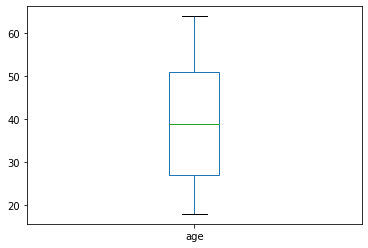

In [114]:
df['age'].plot(kind = 'box')

In [89]:
zBMI = stats.zscore(df['bmi'])

In [90]:
np.count_nonzero( np.where(np.abs(zBMI)>3) )

4

In [92]:
np.where(np.abs(zBMI)>3)

(array([ 111,  816, 1010, 1266], dtype=int64),)

In [101]:
max(df['bmi'])

53.13

In [108]:
min(df['bmi'])

15.96

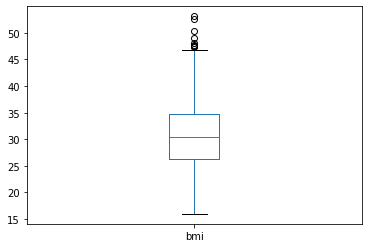

In [115]:
df['bmi'].plot(kind = 'box')

In [102]:
zCharges = stats.zscore(df['charges'])

In [103]:
np.where(np.abs(zCharges)>3)

(array([  33,  524,  556,  789, 1104, 1183, 1194, 1249], dtype=int64),)

In [105]:
np.count_nonzero( np.where(np.abs(zCharges)>3) )

8

In [106]:
max(df['charges'])

63800.4910568101

In [107]:
min(df['charges'])

984.6569978375821

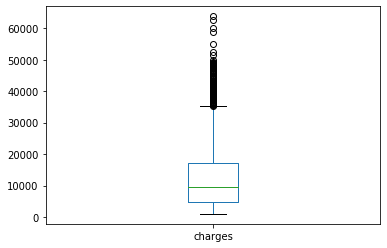

In [116]:
df['charges'].plot(kind = 'box')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C7CB48708>,
      dtype=object)

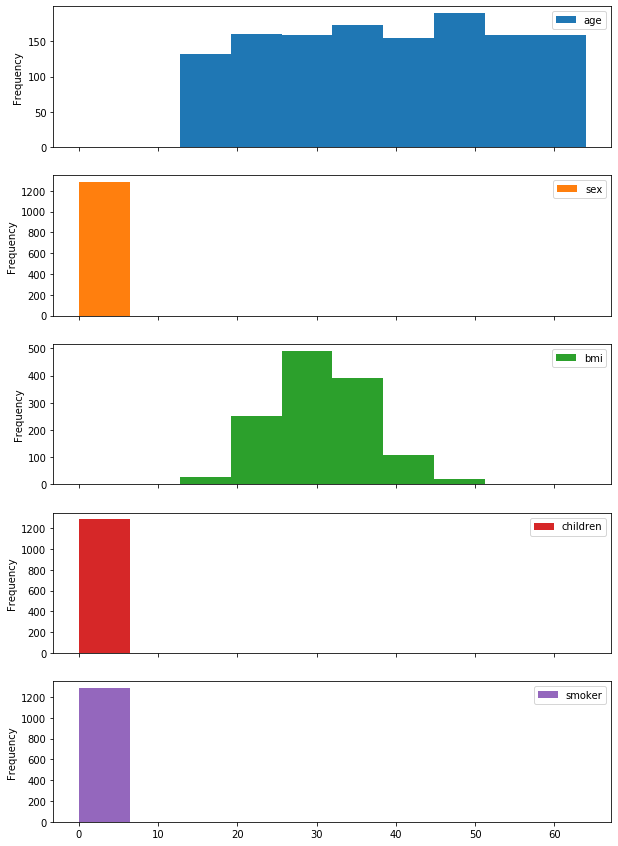

In [27]:
df.plot(kind = 'hist', subplots = True, figsize = (10, 15))

<BarContainer object of 2 artists>

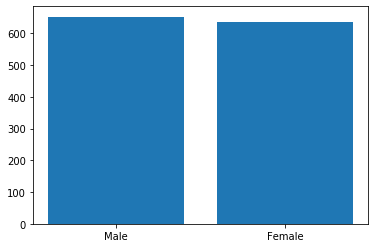

In [37]:
plt.bar(['Male','Female'], np.array(df.groupby(by ='sex')['sex'].size()))

<BarContainer object of 2 artists>

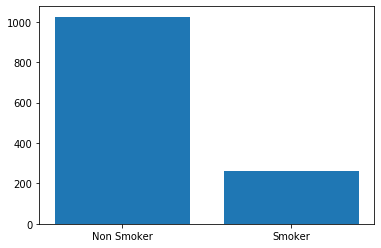

In [38]:
plt.bar(['Non Smoker','Smoker'], np.array(df.groupby(by ='smoker')['smoker'].size()))

In [39]:
df.groupby(by ='region')['region'].size()

region
northeast    310
northwest    316
southeast    348
southwest    313
Name: region, dtype: int64

<BarContainer object of 4 artists>

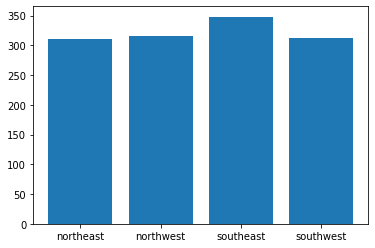

In [40]:
plt.bar(['northeast', 'northwest', 'southeast', 'southwest'], np.array(df.groupby(by ='region')['region'].size()))

<BarContainer object of 6 artists>

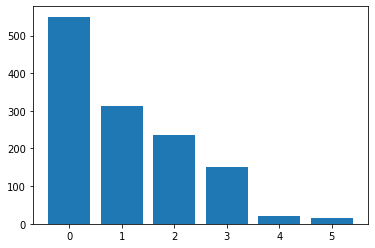

In [43]:
plt.bar(['0', '1', '2', '3', '4', '5'], np.array(df.groupby(by ='children')['children'].size()))

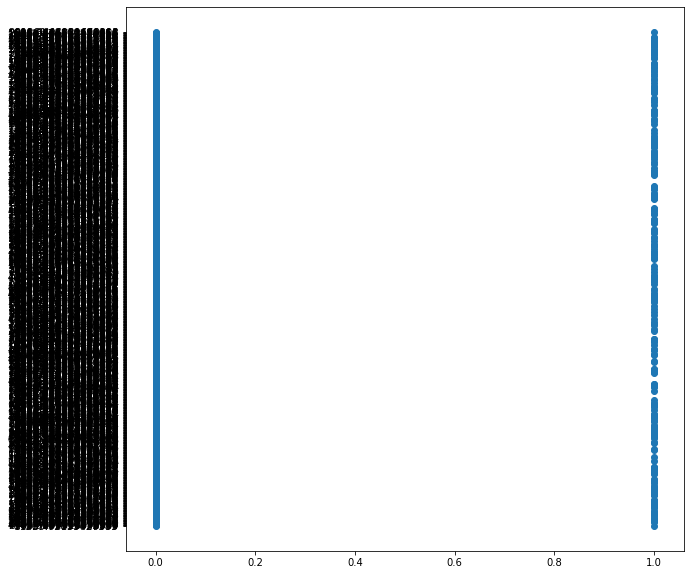

In [60]:
plt.scatter(x = np.array(df['smoker']) , y = np.array(df['charges']))
plt.gcf().set_size_inches(10,10)

In [70]:
np.mean(df[df['smoker']==1]['charges'])

32095.872017575057

In [71]:
np.mean(df[df['smoker']==0]['charges'])

8558.743679064368

In [72]:
means = [np.mean(df[df['smoker']==0]['charges']), np.mean(df[df['smoker']==1]['charges'])]

<BarContainer object of 2 artists>

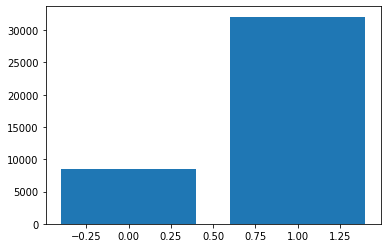

In [77]:
plt.bar(x =[0, 1], height = means)

(array([1025.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         262.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

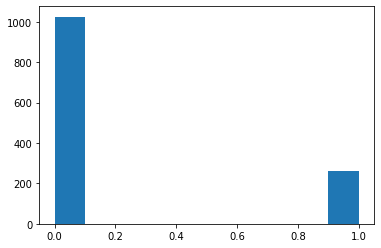

In [78]:
plt.hist(np.array(df['smoker']))

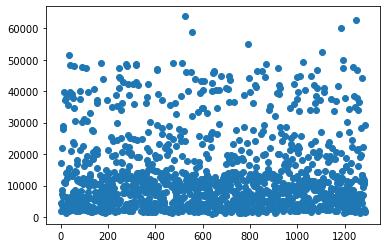

In [79]:
plt.scatter(np.array(range(len(df['charges']))), df['charges'])

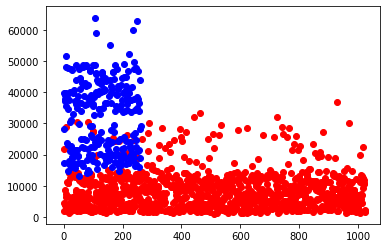

In [131]:
plt.scatter(np.array(range(len(df[df['smoker']==0]['charges']))), df[df['smoker']==0]['charges'], color = 'red', label = 'Non Smoker')
plt.scatter(np.array(range(len(df[df['smoker']==1]['charges']))), df[df['smoker']==1]['charges'], color = 'blue')

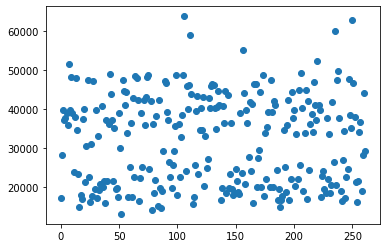

In [82]:
plt.scatter(np.array(range(len(df[df['smoker']==1]['charges']))), df[df['smoker']==1]['charges'])

In [125]:
df['charges'] = df['charges'].astype('float')

In [129]:
df['charges'] = np.round(np.array(df['charges']))

In [130]:
df['charges']

0       17225.0
1        1968.0
2        4605.0
3       21864.0
4        4042.0
         ...   
1293    10614.0
1294     2399.0
1295     1606.0
1296     2019.0
1297    29160.0
Name: charges, Length: 1287, dtype: float64

In [68]:
df.dtypes

age         float64
sex         float64
bmi         float64
children      int64
smoker      float64
region       object
charges      object
dtype: object

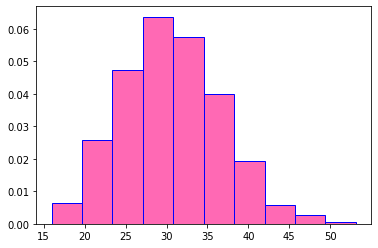

In [53]:
counts,binedges,theplot = plt.hist(np.array(df['bmi']),                      
        color="hotpink",edgecolor="blue",
        density=1, label="simulated")

In [54]:
bincenters=(binedges[:-1]+binedges[1:])/2

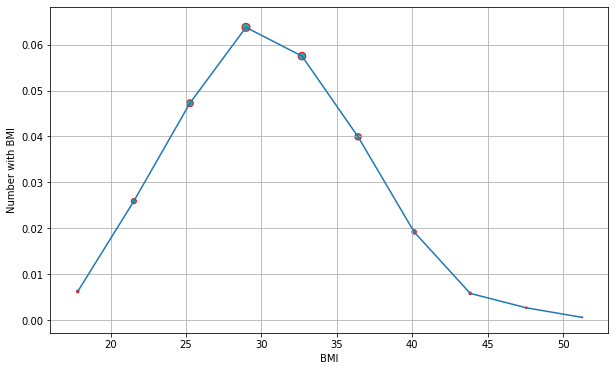

In [58]:
plt.plot(bincenters, counts)
plt.scatter(bincenters,counts, s=counts*1000,
           color="red",facecolor="lightseagreen")
plt.grid()
plt.ylabel("Number with BMI")
plt.xlabel("BMI")

plt.gcf().set_size_inches(10,6)